# 一个完整的机器学习项目 
# 房价预测

## 我们选择的是StatLib的加州房产价格数据集

In [1]:
# 导入相关包
import pandas as pd
import os

INPUT_PATH = 'dataset' # 输入目录
def load_data(file, path=INPUT_PATH):
    """  
        加载csv文件
    """
    csv_path=os.path.join(path, file)
    return pd.read_csv(csv_path)


In [2]:
# 首先我们看下数据，发现有10个属性
housing = load_data("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# info() 方法可以快速查看数据的描述，特别是总行数、每个属性的类型和非空值的数量
# total_bedrooms 有部分缺失  只有 ocean_proximity 属性不是数值属性
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
#value_counts()方法查看该项中都有哪些类别
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
# describe()方法展示给数值属性的统计信息
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


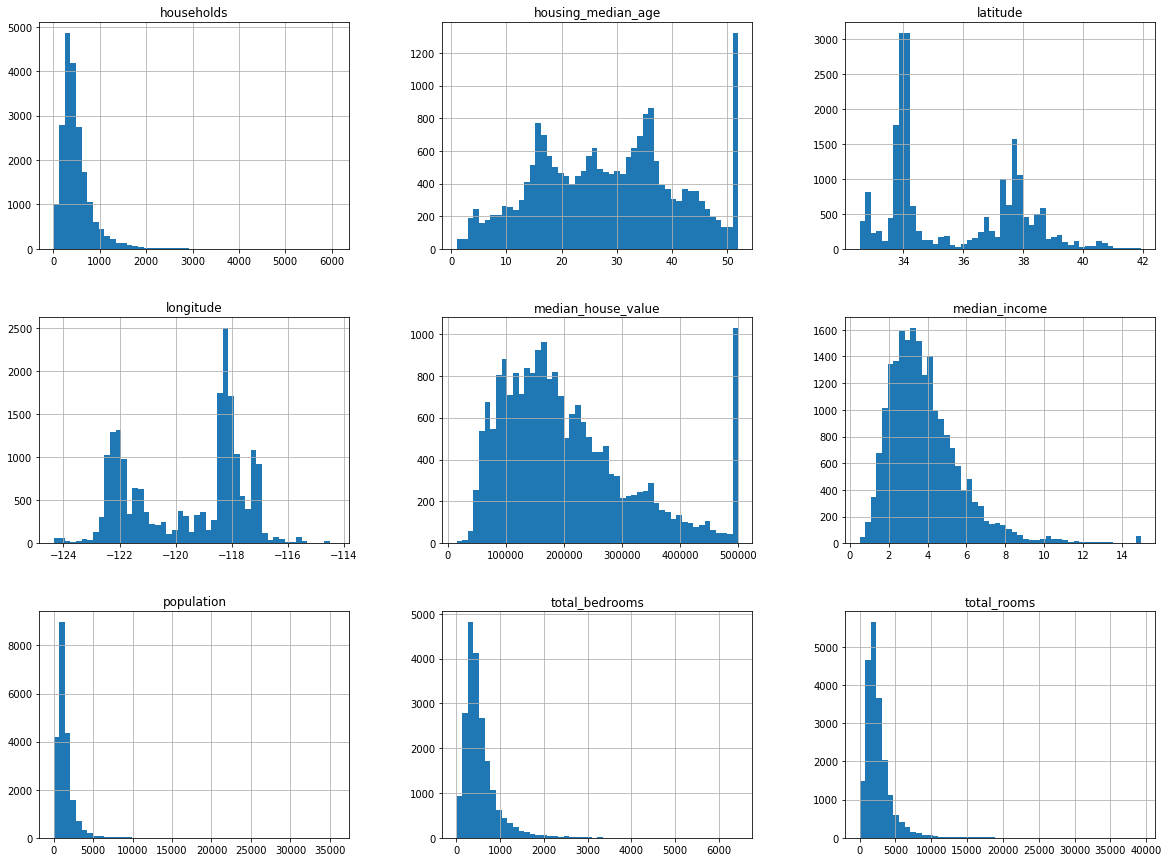

In [7]:
# 观察每个数值属性的柱状图
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
# 创建测试集 ，为了防止采样偏差，这里使用分层采样
# 测试集通常被忽略，但实际是机器学习非常重要的一部分。
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

#将收入中位数除以1.5（以限制收入分类的数量），创建了一个收入类别属性，
#用ceil对值舍入（以产生离散的分类），然后将所有大于5的分类归入到分类5
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace= True)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=41)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

# 分层采样就是按照这里给的 income_cat 分类比例来的
housing["income_cat"].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

## 探索性数据分析

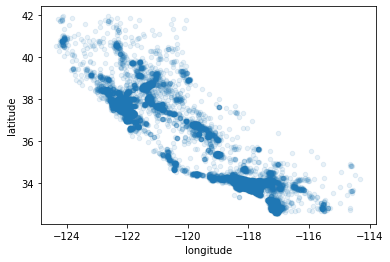

In [9]:
# 从经度和纬度查看密度分布
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude",y="latitude", alpha=0.1)
plt.show()

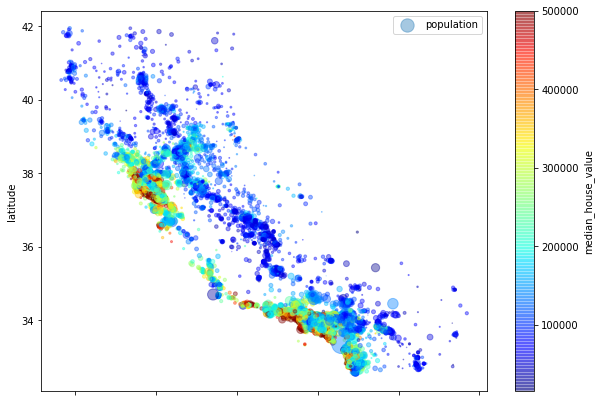

In [10]:
#  这张图可以看出房价和 靠海位置和人口密度联系密切
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()
plt.show()

In [11]:
# 通过皮尔逊相关系数 查找关联
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687668
total_rooms           0.131987
housing_median_age    0.111686
households            0.063285
total_bedrooms        0.046671
population           -0.024677
longitude            -0.049897
latitude             -0.141620
Name: median_house_value, dtype: float64

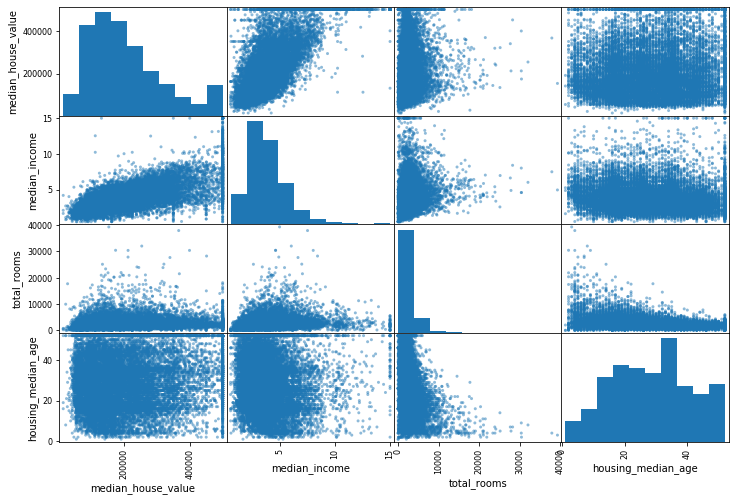

In [12]:
# scatter_matrix函数画出每个数值属性对每个其它数值属性的图
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

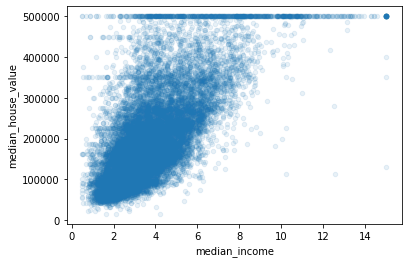

In [13]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.show()

In [14]:
# 属性组合
# 我们真正需要的是每户有几个房间
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
# 总卧室与总房间的占比
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
# 每户人口数
housing["population_per_household"]=housing["population"]/housing["households"]
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687668
rooms_per_household         0.155908
total_rooms                 0.131987
housing_median_age          0.111686
households                  0.063285
total_bedrooms              0.046671
population                 -0.024677
population_per_household   -0.032129
longitude                  -0.049897
latitude                   -0.141620
bedrooms_per_room          -0.256628
Name: median_house_value, dtype: float64

## 准备数据

In [20]:
# 准备数据
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
housing_num = housing.drop('ocean_proximity', axis=1)
housing_cat = housing[['ocean_proximity']]

## 流水线

In [21]:
# 自定义转换器
# 进行清理操作或者属性组合
from sklearn.base import BaseEstimator, TransformerMixin


rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        """ 
            是否增加bedrooms_per_room属性
        """
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


In [22]:
#  数值类预处理流水线
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), # 中位数填充缺失值
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])


In [24]:
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[ 0.76864785, -0.84900995, -0.68921602, ...,  0.08686294,
        -0.05081885, -0.59589883],
       [ 0.85858718, -0.94286039, -1.24472593, ...,  0.97763978,
        -0.03281407, -1.31536433],
       [-0.97017917,  1.37993786,  0.58052093, ..., -0.50741255,
        -0.0213332 ,  0.8634663 ],
       ...,
       [-1.47483874,  1.06553891, -1.00665025, ..., -0.21367022,
        -0.16283672,  0.33588826],
       [-1.1450612 ,  0.82152778, -1.08600881, ..., -0.16492238,
         0.05365635, -0.24709171],
       [ 0.75365796, -0.71761934,  0.73923805, ..., -0.05519075,
        -0.02969452, -0.49016635]])

In [26]:
# 完整预处理流水线
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[ 0.76864785, -0.84900995, -0.68921602, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.85858718, -0.94286039, -1.24472593, ...,  0.        ,
         0.        ,  0.        ],
       [-0.97017917,  1.37993786,  0.58052093, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.47483874,  1.06553891, -1.00665025, ...,  0.        ,
         1.        ,  0.        ],
       [-1.1450612 ,  0.82152778, -1.08600881, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.75365796, -0.71761934,  0.73923805, ...,  0.        ,
         0.        ,  0.        ]])

## 选择模型并训练

In [30]:
# 线性模型
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

# 测试一下
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [294588.38179822 636762.75387885  99093.84597554  77575.50411737
 160899.24095528]
Labels: [318500.0, 500001.0, 93800.0, 59200.0, 150300.0]


In [31]:
# 误差评估 该模型欠拟合
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68270.52887321486

In [32]:
# 决策树模型
# 模型过拟合
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [33]:
# 采用交叉验证
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [72393.79848859 70569.2793531  71470.3893173  71360.5937829
 70622.15321306 72354.42322649 72416.68340192 69518.66128272
 70814.28569717 69161.3142788 ]
Mean: 71068.15820420632
Standard deviation: 1096.6710897813264


In [35]:
# 随机森林模型
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

forest_reg = RandomForestRegressor()
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

/root/venv3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/root/venv3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/root/venv3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/root/venv3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/root/venv3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: T

Scores: [51032.04093889 51848.13629997 54265.17207808 54290.83401118
 51038.47026714 54626.06887482 54361.47956105 51276.16903627
 51049.52641171 51107.46525998]
Mean: 52489.53627390845
Standard deviation: 1567.283865504322


In [36]:
# svm - 效果更差
from sklearn.svm import SVR
svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

110477.99218593231

In [38]:
# 网格搜索
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
  

In [39]:
# 结果
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [40]:
# 最佳估计器
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [41]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64206.32391833391 {'max_features': 2, 'n_estimators': 3}
55256.42420456929 {'max_features': 2, 'n_estimators': 10}
52769.33964998061 {'max_features': 2, 'n_estimators': 30}
59996.72213052679 {'max_features': 4, 'n_estimators': 3}
51769.33371800769 {'max_features': 4, 'n_estimators': 10}
49830.662781066974 {'max_features': 4, 'n_estimators': 30}
58205.87643171337 {'max_features': 6, 'n_estimators': 3}
51401.490162356386 {'max_features': 6, 'n_estimators': 10}
49496.55127764523 {'max_features': 6, 'n_estimators': 30}
58020.14095015931 {'max_features': 8, 'n_estimators': 3}
51528.861937538786 {'max_features': 8, 'n_estimators': 10}
49400.4296656292 {'max_features': 8, 'n_estimators': 30}
62096.272770924355 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53678.01882268308 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59575.30344031069 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52362.11117159126 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [42]:
# 随机搜索
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [44]:
# 结果
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48727.14735824348 {'max_features': 7, 'n_estimators': 180}
50943.16075049669 {'max_features': 5, 'n_estimators': 15}
50036.27992477918 {'max_features': 3, 'n_estimators': 72}
50252.61085922619 {'max_features': 5, 'n_estimators': 21}
48865.57945500654 {'max_features': 7, 'n_estimators': 122}
50045.22105932619 {'max_features': 3, 'n_estimators': 75}
49949.97364212912 {'max_features': 3, 'n_estimators': 88}
49039.08735421231 {'max_features': 5, 'n_estimators': 100}
49796.29788348425 {'max_features': 3, 'n_estimators': 150}
65619.57100511619 {'max_features': 5, 'n_estimators': 2}


In [46]:
# 属性重要性
# 这里可以在结果的基础上去除一些没用的特征
feature_importances = rnd_search.best_estimator_.feature_importances_
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.34356836952564174, 'median_income'),
 (0.16154866185093297, 'INLAND'),
 (0.10810796306506845, 'pop_per_hhold'),
 (0.07244031812268707, 'longitude'),
 (0.0699036114066868, 'bedrooms_per_room'),
 (0.06495204546999925, 'latitude'),
 (0.058397270994477314, 'rooms_per_hhold'),
 (0.04247686781469886, 'housing_median_age'),
 (0.016473331222041133, 'total_rooms'),
 (0.01608079799007836, 'population'),
 (0.01567723156096896, 'total_bedrooms'),
 (0.015086820938071897, 'households'),
 (0.007927200468753743, '<1H OCEAN'),
 (0.00461685398336854, 'NEAR OCEAN'),
 (0.002613694011495486, 'NEAR BAY'),
 (0.00012896157502946017, 'ISLAND')]

In [47]:
# 最终模型
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

49842.73783365214

In [50]:
# 保存模型
from sklearn.externals import joblib
joblib.dump(final_model, "my_model.pkl")
# my_model_loaded = joblib.load("my_model.pkl")

['my_model.pkl']

## 其他

In [58]:
# 只选择最重要的几个特征
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]
k = 5
top_k_feature_indices = indices_of_top_k(feature_importances, k)
sorted(zip(feature_importances, attributes), reverse=True)[:k]

# 加入流水线
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)
housing_prepared_top_k_features

array([[ 0.76864785,  1.12857229, -0.05081885, -0.59589883,  0.        ],
       [ 0.85858718,  5.85418913, -0.03281407, -1.31536433,  0.        ],
       [-0.97017917, -0.87715458, -0.0213332 ,  0.8634663 ,  1.        ],
       ...,
       [-1.47483874,  0.29100734, -0.16283672,  0.33588826,  0.        ],
       [-1.1450612 ,  1.05093328,  0.05365635, -0.24709171,  0.        ],
       [ 0.75365796, -0.09003395, -0.02969452, -0.49016635,  0.        ]])